# Movie Profitability Analysis
The primary objective of this analysis is to explore the relationship between movie budgets and their generated profits, with a focus on the top five most common genres.

### The project aimed to achieve two main goals:
- Investigate how budget correlates with profitability, and visualize how the year of release affects the distribution of movies within the scatterplot.
- Develop a Linear Regression model to predict movie profit based on budget alone, evaluating the accuracy of such a model across different genres.

By analyzing each of the top five genres separately, we aimed to uncover if specific genres show a stronger correlation between budget and profitability. 

In [2]:
!pip install pandas matplotlib seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install kagglehub

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\glocc\.cache\kagglehub\datasets\rounakbanik\the-movies-dataset\versions\7


In [6]:
df = pd.read_csv("C:/Users/glocc/.cache/kagglehub/datasets/rounakbanik/the-movies-dataset/versions/7/movies_metadata.csv", low_memory=False)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [8]:
#Data Cleaning Process: we remove the unnecessary columns in our project. Since the focus is on budget vs. revenue by genre, we can remove some columns.

df = df[['title', 'budget', 'revenue', 'genres', 'release_date']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         45460 non-null  object 
 1   budget        45466 non-null  object 
 2   revenue       45460 non-null  float64
 3   genres        45466 non-null  object 
 4   release_date  45379 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [10]:
# Drop rows with missing values
df = df.dropna()

In [11]:
# Remove duplicates if any
df = df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         45346 non-null  object 
 1   budget        45346 non-null  object 
 2   revenue       45346 non-null  float64
 3   genres        45346 non-null  object 
 4   release_date  45346 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [13]:
#convert budget data type to numeric; errors=coerce makes it so that where this cannot be done there would be missing values. 
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         45346 non-null  object 
 1   budget        45346 non-null  int64  
 2   revenue       45346 non-null  float64
 3   genres        45346 non-null  object 
 4   release_date  45346 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB


In [14]:
#let's make the revenue in int64 for coherence
df['revenue'] = pd.to_numeric(df['budget'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         45346 non-null  object
 1   budget        45346 non-null  int64 
 2   revenue       45346 non-null  int64 
 3   genres        45346 non-null  object
 4   release_date  45346 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.1+ MB


In [15]:
#filter out eventual "zero" in budget or revenue
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8876 entries, 0 to 45422
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         8876 non-null   object
 1   budget        8876 non-null   int64 
 2   revenue       8876 non-null   int64 
 3   genres        8876 non-null   object
 4   release_date  8876 non-null   object
dtypes: int64(2), object(3)
memory usage: 416.1+ KB


There were **a lot null values**. 

In [18]:
#let's start the exploratory data analysis (EDA) phase. 
df.describe()  # Summary statistics for numeric columns 

,budget,revenue
count,8.876000e+03,8.876000e+03
mean,2.162354e+07,2.162354e+07
std,3.433044e+07,3.433044e+07
min,1.000000e+00,1.000000e+00
25%,2.000000e+06,2.000000e+06
50%,8.000000e+06,8.000000e+06
75%,2.500000e+07,2.500000e+07
max,3.800000e+08,3.800000e+08


In [19]:
df.head(10)

,title,budget,revenue,genres,release_date
0,Toy Story,30000000,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30
1,Jumanji,65000000,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15
3,Waiting to Exhale,16000000,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-12-22
5,Heat,60000000,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",1995-12-15
6,Sabrina,58000000,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",1995-12-15
8,Sudden Death,35000000,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1995-12-22
9,GoldenEye,58000000,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1995-11-16
10,The American President,62000000,62000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-11-17
13,Nixon,44000000,44000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",1995-12-22
14,Cutthroat Island,98000000,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1995-12-22


It seems there was an issue with the pd.to_numeric function, as the budget and revenue columns are showing identical values, which should not be the case. To investigate, let's reload the original dataframe and check whether the values were the same even before any transformation.

Additionally, I realized that I should have isolated the year from the release_date column, which was still stored as an object data type. During the exploratory analysis phase, I also noticed that the genres are stored in *dictionaries*. To simplify the analysis, we should extract the genres into a more accessible format, such as separate columns or a *list*, so we can work with them more effectively.

In [21]:
#Let's try and fix things. 
df = pd.read_csv("C:/Users/glocc/.cache/kagglehub/datasets/rounakbanik/the-movies-dataset/versions/7/movies_metadata.csv", low_memory=False)

#drop columns, missing values and duplicates
df = df[['title', 'budget', 'revenue', 'genres', 'release_date']]
df = df.dropna()
df = df.drop_duplicates()

In [22]:
df.head(10)

,title,budget,revenue,genres,release_date
0,Toy Story,30000000,373554033.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30
1,Jumanji,65000000,262797249.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15
2,Grumpier Old Men,0,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995-12-22
3,Waiting to Exhale,16000000,81452156.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-12-22
4,Father of the Bride Part II,0,76578911.0,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10
5,Heat,60000000,187436818.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",1995-12-15
6,Sabrina,58000000,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",1995-12-15
7,Tom and Huck,0,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1995-12-22
8,Sudden Death,35000000,64350171.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1995-12-22
9,GoldenEye,58000000,352194034.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1995-11-16


In [23]:
#clearly the data were different. I made a mistake in the trasformation to integer. Let's just trasform the budget in float64

In [24]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

In [25]:
df.head(10)

,title,budget,revenue,genres,release_date
0,Toy Story,30000000,373554033.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30
1,Jumanji,65000000,262797249.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15
2,Grumpier Old Men,0,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995-12-22
3,Waiting to Exhale,16000000,81452156.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-12-22
4,Father of the Bride Part II,0,76578911.0,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10
5,Heat,60000000,187436818.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",1995-12-15
6,Sabrina,58000000,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",1995-12-15
7,Tom and Huck,0,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1995-12-22
8,Sudden Death,35000000,64350171.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1995-12-22
9,GoldenEye,58000000,352194034.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1995-11-16


In [26]:
#let's make the release_data a date datatype and isolate the year. 
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df = df.dropna()
df['release_year'] = df['release_date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         45346 non-null  object        
 1   budget        45346 non-null  int64         
 2   revenue       45346 non-null  float64       
 3   genres        45346 non-null  object        
 4   release_date  45346 non-null  datetime64[ns]
 5   release_year  45346 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 2.2+ MB


In [27]:
df = df.drop('release_date', axis=1)

In [28]:
# Print the genres of the first film in the DataFrame
print(df['genres'].iloc[0])

[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]


In [29]:
df['genre_names'] = df['genres'].apply(lambda genres: [genre['name'] for genre in genres] if isinstance(genres, list) else [])

In [30]:
df.head()

,title,budget,revenue,genres,release_year,genre_names
0,Toy Story,30000000,373554033.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995,[]
1,Jumanji,65000000,262797249.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995,[]
2,Grumpier Old Men,0,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995,[]
3,Waiting to Exhale,16000000,81452156.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995,[]
4,Father of the Bride Part II,0,76578911.0,"[{'id': 35, 'name': 'Comedy'}]",1995,[]


In [31]:
#did not work, the text is not recognised as dictionaries
df = df.drop('genre_names', axis=1)

In [32]:
import ast

# Convert the genres column from string to list 
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [33]:
# Extract genre names and store them in a new column
df['genre_names'] = df['genres'].apply(lambda genres: [genre['name'] for genre in genres] if isinstance(genres, list) else [])

In [34]:
df.head()

,title,budget,revenue,genres,release_year,genre_names
0,Toy Story,30000000,373554033.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995,"[Animation, Comedy, Family]"
1,Jumanji,65000000,262797249.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995,"[Adventure, Fantasy, Family]"
2,Grumpier Old Men,0,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995,"[Romance, Comedy]"
3,Waiting to Exhale,16000000,81452156.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995,"[Comedy, Drama, Romance]"
4,Father of the Bride Part II,0,76578911.0,"[{'id': 35, 'name': 'Comedy'}]",1995,[Comedy]


In [35]:
#let's create the profit column 
df['Profit'] = df['revenue'] - df['budget']

In [36]:
#chech if all movies were profitable
(df['Profit'] >= 0).all()

False

In [37]:
(df['Profit'] < 0).sum()

5104

In [38]:
from collections import Counter

# Flatten the list of genres to get their counts
all_genres = [genre for sublist in df['genres'] for genre in sublist]
genre_counts = Counter([genre['name'] for genre in all_genres])

# Get the top 5 genres
top_5_genres = [genre[0] for genre in genre_counts.most_common(5)]
print(top_5_genres)

['Drama', 'Comedy', 'Thriller', 'Romance', 'Action']


The next step is to one-hot encode the gernes so that I could build a regression model for budget-profit divided by gerne to see in which genre the correlation is stronger.

In [40]:
# Initialize the new columns with 0's
for genre in top_5_genres:
    df[genre] = df['genres'].apply(lambda x: 1 if any(d['name'] == genre for d in x) else 0)

# Display the DataFrame with the new one-hot encoded genre columns
df.head()

,title,budget,revenue,genres,release_year,genre_names,Profit,Drama,Comedy,Thriller,Romance,Action
0,Toy Story,30000000,373554033.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995,"[Animation, Comedy, Family]",343554033.0,0,1,0,0,0
1,Jumanji,65000000,262797249.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995,"[Adventure, Fantasy, Family]",197797249.0,0,0,0,0,0
2,Grumpier Old Men,0,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995,"[Romance, Comedy]",0.0,0,1,0,1,0
3,Waiting to Exhale,16000000,81452156.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995,"[Comedy, Drama, Romance]",65452156.0,1,1,0,1,0
4,Father of the Bride Part II,0,76578911.0,"[{'id': 35, 'name': 'Comedy'}]",1995,[Comedy],76578911.0,0,1,0,0,0


In [41]:
df = df[df[top_5_genres].sum(axis=1) > 0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35192 entries, 0 to 45463
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         35192 non-null  object 
 1   budget        35192 non-null  int64  
 2   revenue       35192 non-null  float64
 3   genres        35192 non-null  object 
 4   release_year  35192 non-null  int32  
 5   genre_names   35192 non-null  object 
 6   Profit        35192 non-null  float64
 7   Drama         35192 non-null  int64  
 8   Comedy        35192 non-null  int64  
 9   Thriller      35192 non-null  int64  
 10  Romance       35192 non-null  int64  
 11  Action        35192 non-null  int64  
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 3.4+ MB


In [42]:
#check for correlation before deciding on a regression model
df[['budget', 'Profit']].corr()

,budget,Profit
budget,1.000000,0.610373
Profit,0.610373,1.000000


In [43]:
# Filter for Comedy movies only (where the Comedy column is 1)
df_comedy = df[df['Comedy'] == 1]

df_comedy.info()

df_comedy[['budget','Profit']].corr()

<class 'pandas.core.frame.DataFrame'>
Index: 13175 entries, 0 to 45454
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         13175 non-null  object 
 1   budget        13175 non-null  int64  
 2   revenue       13175 non-null  float64
 3   genres        13175 non-null  object 
 4   release_year  13175 non-null  int32  
 5   genre_names   13175 non-null  object 
 6   Profit        13175 non-null  float64
 7   Drama         13175 non-null  int64  
 8   Comedy        13175 non-null  int64  
 9   Thriller      13175 non-null  int64  
 10  Romance       13175 non-null  int64  
 11  Action        13175 non-null  int64  
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 1.3+ MB


,budget,Profit
budget,1.000000,0.573421
Profit,0.573421,1.000000


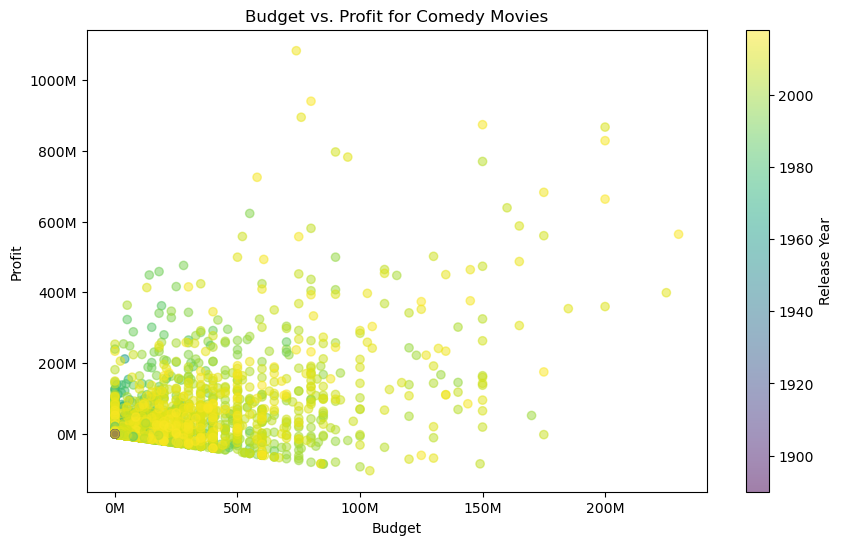

In [44]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Formatter function to convert values to millions
def millions(x, pos):
    return f'{x * 1e-6:.0f}M'

# Create the scatterplot with unchanged data but formatted axis labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_comedy['budget'], df_comedy['Profit'], c=df_comedy['release_year'], cmap='viridis', alpha=0.5)
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Budget vs. Profit for Comedy Movies')
plt.colorbar(scatter, label='Release Year')

# Apply the formatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.show()

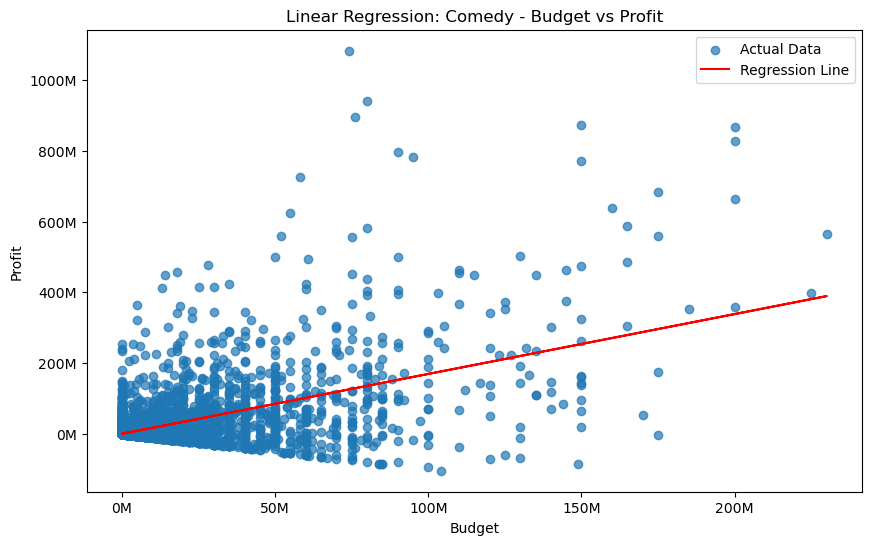

R-squared: 0.33


In [45]:
from sklearn.linear_model import LinearRegression

# Prepare data for regression
X = df_comedy[['budget']]  # Independent variable
y = df_comedy['Profit']    # Dependent variable

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict profit based on budget
y_pred = model.predict(X)

# Plot regression line along with the scatterplot
plt.figure(figsize=(10,6))
plt.scatter(df_comedy['budget'], df_comedy['Profit'], alpha=0.7, label='Actual Data')
plt.plot(df_comedy['budget'], y_pred, color='red', label='Regression Line')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Linear Regression: Comedy - Budget vs Profit')
plt.legend()

# Format the x and y axis labels to show in millions (e.g., 1e8 -> 100M)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1e-6:.0f}M'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1e-6:.0f}M'))

plt.show()

# Print the R-squared value to measure goodness of fit
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.2f}")

In [46]:
# Filter for Drama movies only (where the Drama column is 1)
df_drama = df[df['Drama'] == 1]

df_drama.info()

df_drama[['budget','Profit']].corr()

<class 'pandas.core.frame.DataFrame'>
Index: 20234 entries, 3 to 45463
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         20234 non-null  object 
 1   budget        20234 non-null  int64  
 2   revenue       20234 non-null  float64
 3   genres        20234 non-null  object 
 4   release_year  20234 non-null  int32  
 5   genre_names   20234 non-null  object 
 6   Profit        20234 non-null  float64
 7   Drama         20234 non-null  int64  
 8   Comedy        20234 non-null  int64  
 9   Thriller      20234 non-null  int64  
 10  Romance       20234 non-null  int64  
 11  Action        20234 non-null  int64  
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 1.9+ MB


,budget,Profit
budget,1.000000,0.468152
Profit,0.468152,1.000000


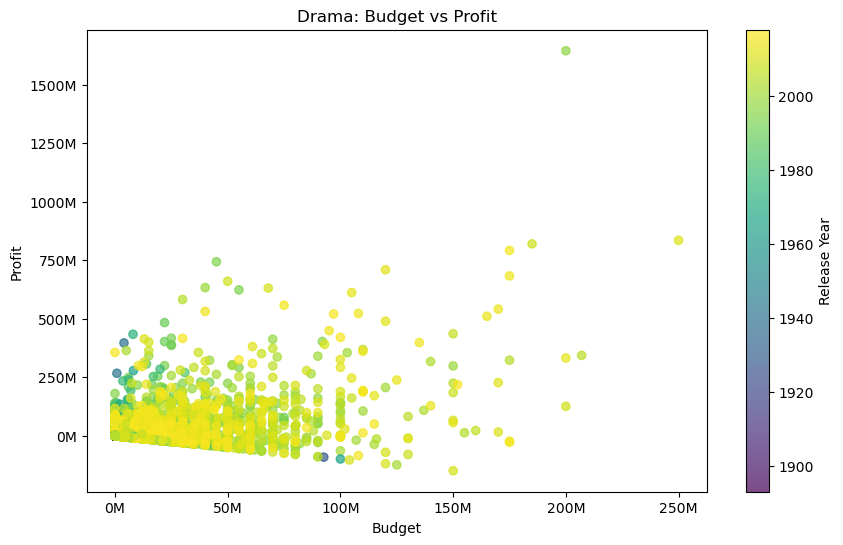

In [47]:
# Formatter function to convert values to millions
def millions(x, pos):
    return f'{x * 1e-6:.0f}M'

plt.figure(figsize=(10,6))
scatter = plt.scatter(df_drama['budget'], df_drama['Profit'], 
                       c=df_drama['release_year'], cmap='viridis', alpha=0.7)
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Drama: Budget vs Profit')
plt.colorbar(scatter, label='Release Year')

# Apply the formatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.show()

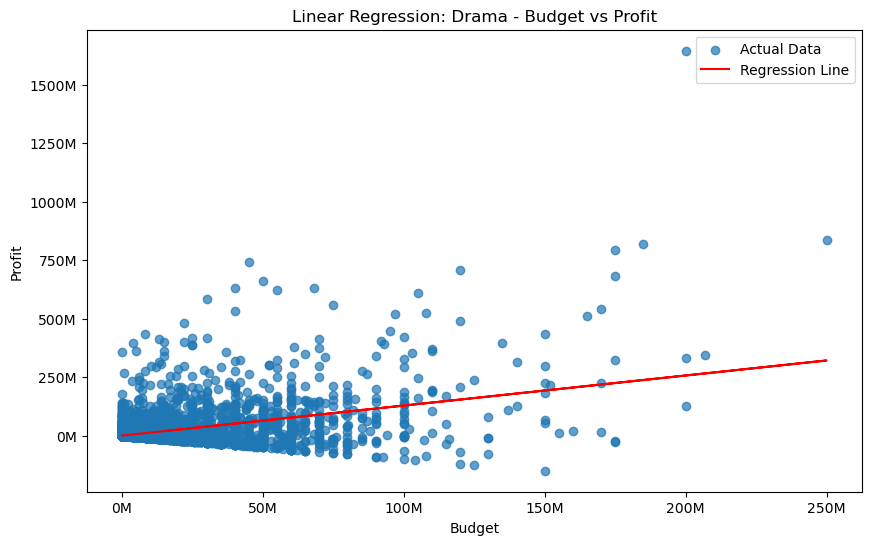

R-squared: 0.22


In [48]:
# Prepare data for regression
X = df_drama[['budget']]  # Independent variable
y = df_drama['Profit']    # Dependent variable

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict profit based on budget
y_pred = model.predict(X)

# Plot regression line along with the scatterplot
plt.figure(figsize=(10,6))
plt.scatter(df_drama['budget'], df_drama['Profit'], alpha=0.7, label='Actual Data')
plt.plot(df_drama['budget'], y_pred, color='red', label='Regression Line')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Linear Regression: Drama - Budget vs Profit')
plt.legend()

# Format the x and y axis labels to show in millions (e.g., 1e8 -> 100M)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1e-6:.0f}M'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1e-6:.0f}M'))

plt.show()

# Print the R-squared value to measure goodness of fit
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.2f}")

In [49]:
#Filter for Thriller movies only (where the Thriller column is 1)
df_thriller = df[df['Thriller'] == 1]

df_thriller.info()

df_thriller[['budget','Profit']].corr()

<class 'pandas.core.frame.DataFrame'>
Index: 7614 entries, 5 to 45463
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         7614 non-null   object 
 1   budget        7614 non-null   int64  
 2   revenue       7614 non-null   float64
 3   genres        7614 non-null   object 
 4   release_year  7614 non-null   int32  
 5   genre_names   7614 non-null   object 
 6   Profit        7614 non-null   float64
 7   Drama         7614 non-null   int64  
 8   Comedy        7614 non-null   int64  
 9   Thriller      7614 non-null   int64  
 10  Romance       7614 non-null   int64  
 11  Action        7614 non-null   int64  
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 743.6+ KB


,budget,Profit
budget,1.000000,0.604857
Profit,0.604857,1.000000


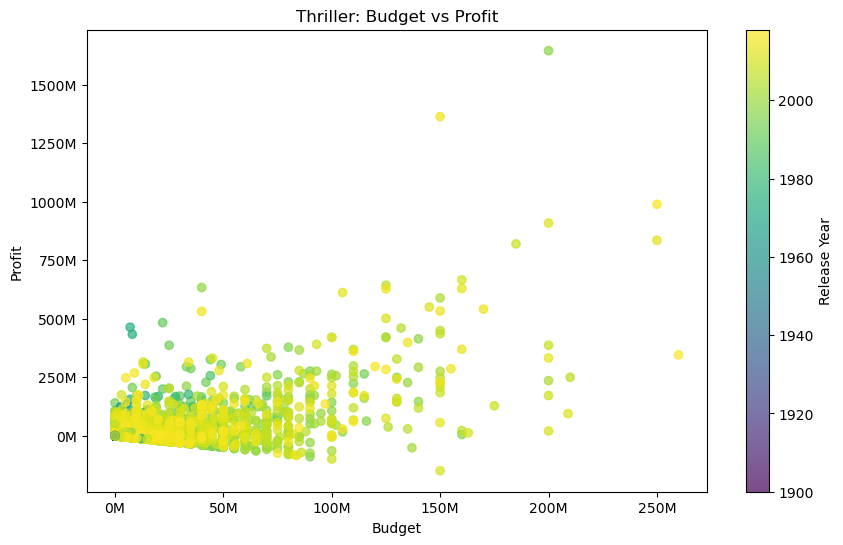

In [50]:
# Formatter function to convert values to millions
def millions(x, pos):
    return f'{x * 1e-6:.0f}M'

plt.figure(figsize=(10,6))
scatter = plt.scatter(df_thriller['budget'], df_thriller['Profit'], 
                       c=df_thriller['release_year'], cmap='viridis', alpha=0.7)
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Thriller: Budget vs Profit')
plt.colorbar(scatter, label='Release Year')

# Apply the formatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.show()

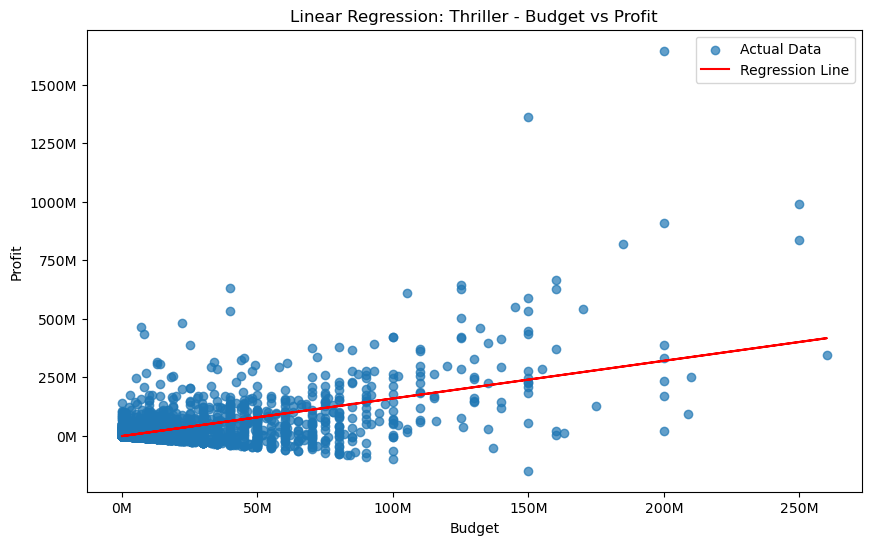

R-squared: 0.37


In [51]:
# Prepare data for regression
X = df_thriller[['budget']]  # Independent variable
y = df_thriller['Profit']    # Dependent variable

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict profit based on budget
y_pred = model.predict(X)

# Plot regression line along with the scatterplot
plt.figure(figsize=(10,6))
plt.scatter(df_thriller['budget'], df_thriller['Profit'], alpha=0.7, label='Actual Data')
plt.plot(df_thriller['budget'], y_pred, color='red', label='Regression Line')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Linear Regression: Thriller - Budget vs Profit')
plt.legend()

# Format the x and y axis labels to show in millions (e.g., 1e8 -> 100M)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1e-6:.0f}M'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1e-6:.0f}M'))

plt.show()

# Print the R-squared value to measure goodness of fit
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.2f}")

In [52]:
#Filter for Action movies only (where the Action column is 1)
df_action = df[df['Action'] == 1]

df_action.info()

df_action[['budget','Profit']].corr()

<class 'pandas.core.frame.DataFrame'>
Index: 6588 entries, 5 to 45463
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         6588 non-null   object 
 1   budget        6588 non-null   int64  
 2   revenue       6588 non-null   float64
 3   genres        6588 non-null   object 
 4   release_year  6588 non-null   int32  
 5   genre_names   6588 non-null   object 
 6   Profit        6588 non-null   float64
 7   Drama         6588 non-null   int64  
 8   Comedy        6588 non-null   int64  
 9   Thriller      6588 non-null   int64  
 10  Romance       6588 non-null   int64  
 11  Action        6588 non-null   int64  
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 643.4+ KB


,budget,Profit
budget,1.000000,0.660017
Profit,0.660017,1.000000


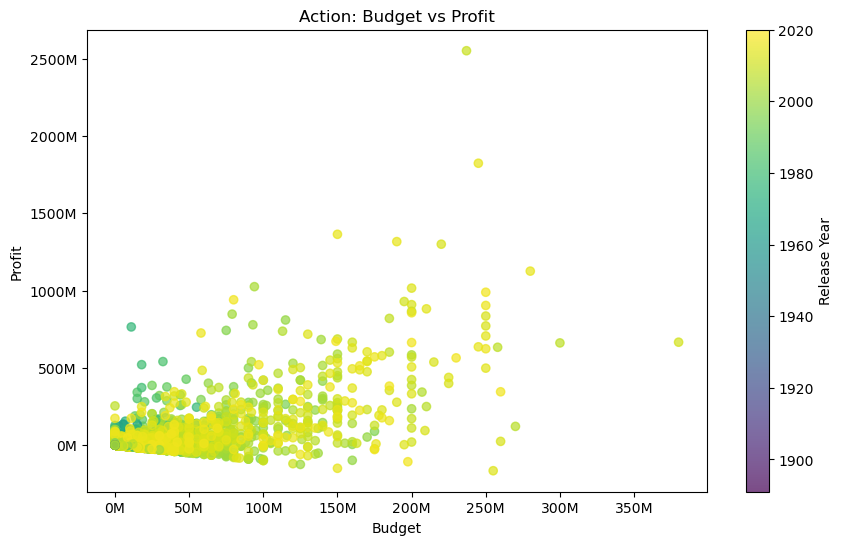

In [53]:
# Formatter function to convert values to millions
def millions(x, pos):
    return f'{x * 1e-6:.0f}M'

plt.figure(figsize=(10,6))
scatter = plt.scatter(df_action['budget'], df_action['Profit'], 
                       c=df_action['release_year'], cmap='viridis', alpha=0.7)
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Action: Budget vs Profit')
plt.colorbar(scatter, label='Release Year')

# Apply the formatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.show()

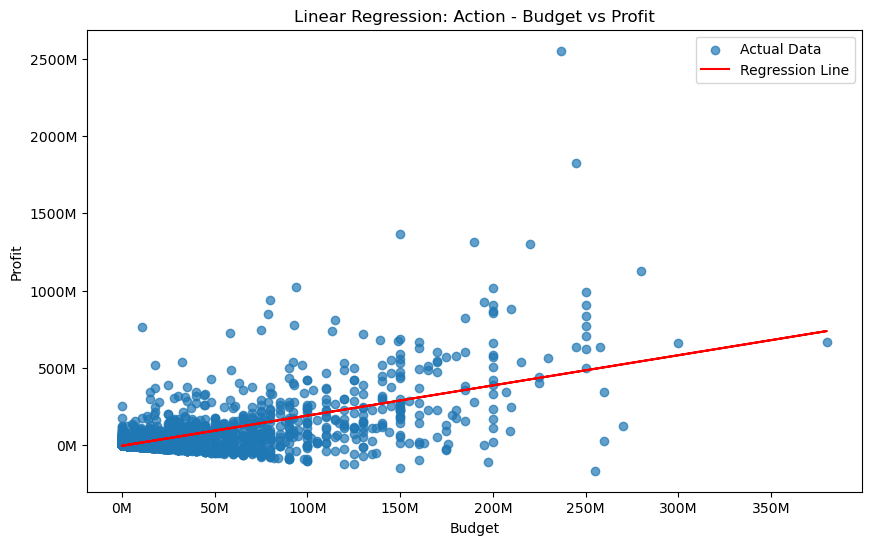

R-squared: 0.44


In [54]:
# Prepare data for regression
X = df_action[['budget']]  # Independent variable
y = df_action['Profit']    # Dependent variable

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict profit based on budget
y_pred = model.predict(X)

# Plot regression line along with the scatterplot
plt.figure(figsize=(10,6))
plt.scatter(df_action['budget'], df_action['Profit'], alpha=0.7, label='Actual Data')
plt.plot(df_action['budget'], y_pred, color='red', label='Regression Line')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Linear Regression: Action - Budget vs Profit')
plt.legend()

# Format the x and y axis labels to show in millions (e.g., 1e8 -> 100M)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1e-6:.0f}M'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1e-6:.0f}M'))

plt.show()

# Print the R-squared value to measure goodness of fit
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.2f}")

In [55]:
#Filter for Romance movies only (where the Romance column is 1)
df_romance = df[df['Romance'] == 1]

df_romance.info()

df_romance[['budget','Profit']].corr()

<class 'pandas.core.frame.DataFrame'>
Index: 6728 entries, 2 to 45460
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         6728 non-null   object 
 1   budget        6728 non-null   int64  
 2   revenue       6728 non-null   float64
 3   genres        6728 non-null   object 
 4   release_year  6728 non-null   int32  
 5   genre_names   6728 non-null   object 
 6   Profit        6728 non-null   float64
 7   Drama         6728 non-null   int64  
 8   Comedy        6728 non-null   int64  
 9   Thriller      6728 non-null   int64  
 10  Romance       6728 non-null   int64  
 11  Action        6728 non-null   int64  
dtypes: float64(2), int32(1), int64(6), object(3)
memory usage: 657.0+ KB


,budget,Profit
budget,1.000000,0.489417
Profit,0.489417,1.000000


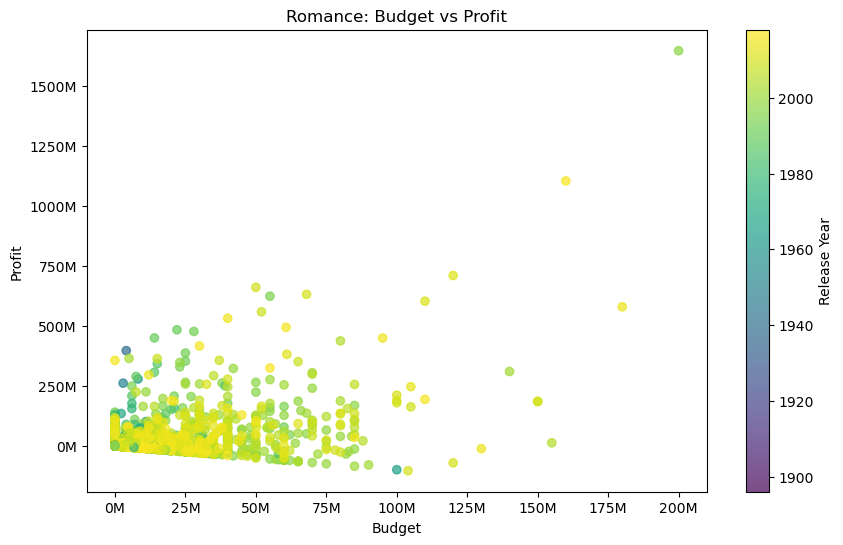

In [56]:
# Formatter function to convert values to millions
def millions(x, pos):
    return f'{x * 1e-6:.0f}M'

plt.figure(figsize=(10,6))
scatter = plt.scatter(df_romance['budget'], df_romance['Profit'], 
                       c=df_romance['release_year'], cmap='viridis', alpha=0.7)
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Romance: Budget vs Profit')
plt.colorbar(scatter, label='Release Year')

# Apply the formatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.show()

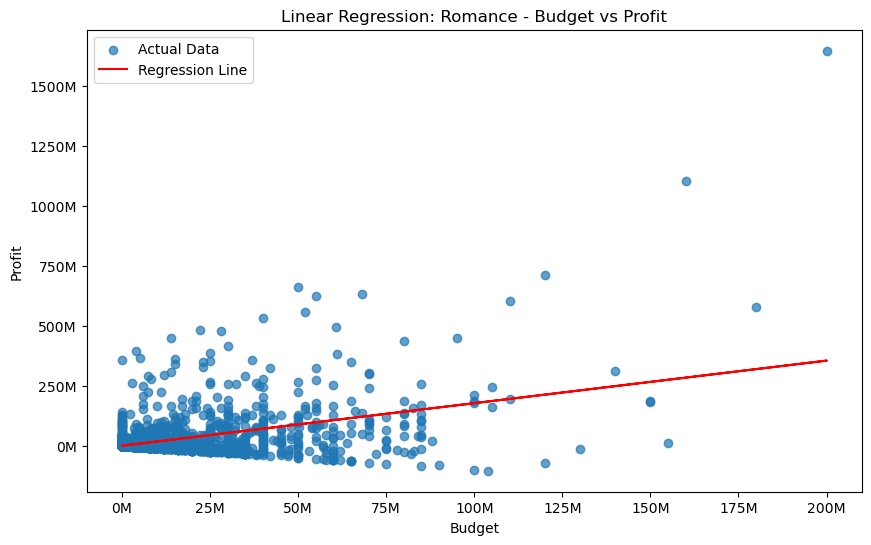

R-squared: 0.24


In [57]:
# Prepare data for regression
X = df_romance[['budget']]  # Independent variable
y = df_romance['Profit']    # Dependent variable

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict profit based on budget
y_pred = model.predict(X)

# Plot regression line along with the scatterplot
plt.figure(figsize=(10,6))
plt.scatter(df_romance['budget'], df_romance['Profit'], alpha=0.7, label='Actual Data')
plt.plot(df_romance['budget'], y_pred, color='red', label='Regression Line')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Linear Regression: Romance - Budget vs Profit')
plt.legend()

# Format the x and y axis labels to show in millions (e.g., 1e8 -> 100M)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1e-6:.0f}M'))
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1e-6:.0f}M'))

plt.show()

# Print the R-squared value to measure goodness of fit
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.2f}")

### Conclusions

The linear regression models built for predicting profitability based on budget alone yielded relatively low R-squared values across all top 5 genres, which was expected. This reinforces the idea that profitability cannot be solely predicted by budget. A high-budget movie does not guarantee high profitability, as other factors play significant roles, such as production quality, marketing, and audience reception.

Interestingly, the highest R-squared value was observed in Action movies, where the model's R-squared reached 0.39. One hypothesis to explain this is that the production of action movies typically involves high costs for special effects, stunts, and action scenes. These elements are often key to a movie's success, meaning the budget is directly tied to the scale and quality of the action sequences, which can contribute to higher profitability. On the other hand, genres like Romance, Drama, and Comedy may be more dependent on the writing and emotional engagement, rather than large-scale production costs, making their profitability less directly linked to budget.

Furthermore, it is important to consider the wide range of years represented in the dataset. The movie industry has undergone significant changes over time, from shifts in production techniques to changes in audience preferences and consumption (e.g., the rise of streaming services). This variability in the data might be another reason the regression model performed poorly. 